In [1]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
import sys
sys.path.insert(1, '/home/sypmauu/GalapagosProject/scripts/functions')
from ParticlePlotFunctions import *
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# NEMO-MEDUSA info

5-day means from 01-05-2000 until 31-12-2010

In [2]:
# Load data of specific date

ddir = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/means/'
ddate = 20020828
map_crop = [2000, 3001, 1000, 2001]

Field = ReadNemo(ddir,ddate)
lon = Field['lon']
lat = Field['lat']
Uvel = Field['Uvel']
Vvel = Field['Vvel']
Tvel = Field['Tvel']

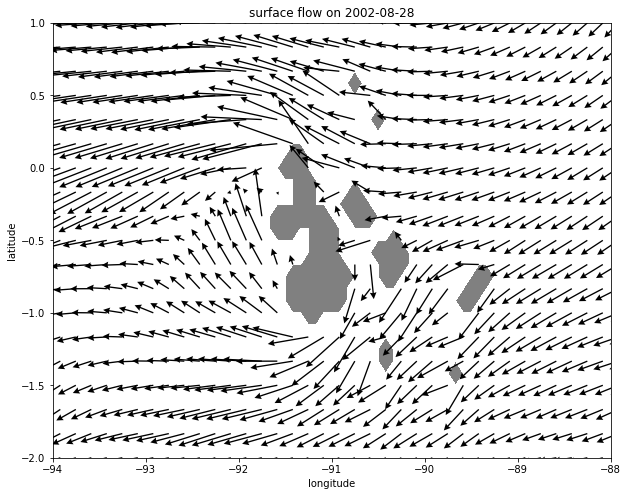

In [5]:
# plot data of specific date

map_extent = [-94,-88,-2,1]
figsize=(10, 8)
Tmin=60
Tmax=70                              
dq=2
headwidth=5
headlength=5
scale=1.5

fig, ax = plt.subplots(figsize=figsize)

levels = np.linspace(Tmin, Tmax, 41)
fig = ax.contourf(lon,lat,Tvel,       
                 levels = levels,    
                 cmap='Greys',       
                 extend='both',      
                 origin='lower')     
ax.set_title('surface flow on 2002-08-28')          
ax.set_xlabel('longitude')                 
ax.set_ylabel('latitude') 
ax.set_xlim(map_extent[0:2])
ax.set_ylim(map_extent[2:4])
ax.set_facecolor('gray')
#cbar = plt.colorbar(fig, ax=ax)
#cbar.ax.set_ylabel('SST (\xb0C)')

if lat.ndim == 1:
    ax.quiver(lon[0::dq],lat[0::dq],
                  Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
                  headwidth=headwidth,
                  headlength=headlength,
                  scale_units='xy',
                  angles='xy',
                  scale=scale)
    
elif lat.ndim == 2:
    ax.quiver(lon[0::dq,0::dq],lat[0::dq,0::dq],
                  Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
                  headwidth=headwidth,
                  headlength=headlength,
                  scale_units='xy',
                  angles='xy',
                  scale=scale) 


plt.savefig('../../results/figures/NEMO_quiver_20020828.pdf')

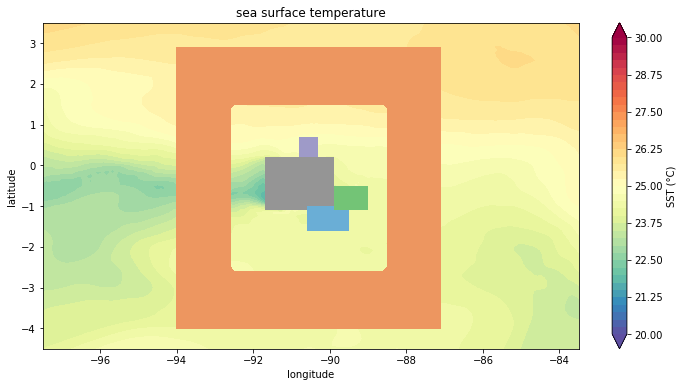

In [71]:
#define boxes for the galapagos islands, and a band where we will release the particles

figsize=(12, 6)
GC = [-90.5,-0.5]
map_extent=[GC[0]-7, GC[0]+7, GC[1]-4, GC[1]+4]
Tmin=20
Tmax=30                               
dq=12
headwidth=5
headlength=7
scale=0.7

fig, ax = plt.subplots(figsize=figsize)

levels = np.linspace(Tmin, Tmax, 41)
fig = ax.contourf(lon,lat,Tvel,       
                 levels = levels,    
                 cmap='Spectral_r',       
                 extend='both',      
                 origin='lower')    
ax.set_title('sea surface temperature')          
ax.set_xlabel('longitude')                 
ax.set_ylabel('latitude') 
ax.set_xlim(map_extent[0:2])
ax.set_ylim(map_extent[2:4])
ax.set_facecolor('gray')
cbar = plt.colorbar(fig, ax=ax)
cbar.ax.set_ylabel('SST (\xb0C)')

Isabela = [-91.7, -89.9, -1.1, 0.2]
lonI = np.arange(Isabela[0],Isabela[1]+0.1,0.1)
latI = np.arange(Isabela[2],Isabela[3]+0.1,0.1)
mapI = np.zeros((len(latI),len(lonI)))
fig2 = ax.contourf(lonI,latI,mapI,levels=np.linspace(0,1,2), cmap='Greys')

Pinta = [-90.8, -90.3, 0.2, 0.7]
lonP = np.arange(Pinta[0],Pinta[1]+0.1,0.1)
latP = np.arange(Pinta[2],Pinta[3]+0.1,0.1)
mapP = np.zeros((len(latP),len(lonP)))
fig3 = ax.contourf(lonP,latP,mapP,levels=np.linspace(0,1,2), cmap='Purples')

Maria = [-90.6, -89.5, -1.6, -1.1]
lonM = np.arange(Maria[0],Maria[1]+0.1,0.1)
latM = np.arange(Maria[2],Maria[3]+0.1,0.1)
mapM = np.zeros((len(latM),len(lonM)))
fig4 = ax.contourf(lonM,latM,mapM,levels=np.linspace(0,1,2), cmap='Blues')

Chris = [-89.9, -89, -1.1, -0.5]
lonC = np.arange(Chris[0],Chris[1]+0.1,0.1)
latC = np.arange(Chris[2],Chris[3]+0.1,0.1)
mapC = np.zeros((len(latC),len(lonC)))
fig5 = ax.contourf(lonC,latC,mapC,levels=np.linspace(0,1,2), cmap='Greens')


lonR = np.arange(GC[0]-3.5,GC[0]+3.5,0.1)
latR = np.arange(GC[1]-3.5,GC[1]+3.5,0.1)
mapR = np.zeros((len(latR),len(lonR)))
width=15
mapR[0:width,:]=1
mapR[-width:,:]=1
mapR[:,0:width]=1
mapR[:,-width:]=1
mapR[mapR==0]=nan
fig6 = ax.contourf(lonR,latR,mapR,levels=np.linspace(-1,1,3),cmap='copper')
 

In [ ]:
# read bathymetry 

latdim = np.arange(1000,2001)
londim = np.arange(2000,3001)

bathy_file = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/domain/bathymetry_ORCA12_V3.3.nc'
dfile = Dataset(bathy_file)
bathy = dfile.variables['Bathymetry'][latdim,londim]
lat = dfile.variables['nav_lat'][latdim,londim]
lon = dfile.variables['nav_lon'][latdim,londim]
bathy = np.where(bathy<1, nan, bathy)

In [ ]:
# read multiple fields and compute mean

ddir = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/means/'
ddates = range(584,657) #year 2008
nz = 0
map_crop = [2000, 3001, 1000, 2001]

Field = ReadNemoMean(ddir, ddates, nz, map_crop)


In [ ]:
# plot mean U,V and SST

lon = Field['lon']
lat = Field['lat']
Umean = Field['Umean']
Vmean = Field['Vmean']
Tmean = Field['Tmean']

map_extent = [-105,-75,-10,10]
PlotSSTquiver(lon,lat,Tmean,Umean,Vmean,figsize=(9,6),map_extent=map_extent)
plt.savefig('../../results/figures/NEMOfields_mean2008.pdf')


In [ ]:
# computes mean of every NEMO year and makes SST + quiver subplots

ddir = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/means/'
nz = 0
map_crop = [2000, 3001, 1000, 2001]
years = range(2000,2011)

figsize=(9,6)
map_extent = [-105,-75,-10,10]
Tmin=20
Tmax=30
dq=12
headwidth=5
headlength=7
scale=0.7

# figure set-up
fig, axs = plt.subplots(3, 4, figsize=figsize, 
                              sharex = True, 
                              sharey = True)
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
fig.text(0.5, 0.04, 'longitude', ha='center', va='center')
fig.text(0.06, 0.5, 'latitude', ha='center', va='center', rotation='vertical')

# start loop
for t in range(len(years)):
    print(years[t])
    sdate = t*73
    edate = sdate + 73
    ddates = range(sdate,edate) 
    Field = ReadNemoMean(ddir, ddates, nz, map_crop)
    lon = Field['lon']
    lat = Field['lat']
    Uvel = Field['Umean']
    Vvel = Field['Vmean']
    Tvel = Field['Tmean']

    levels = np.linspace(Tmin, Tmax, 41)
    im = axs[t].contourf(lon,lat,Tvel,       
                         levels = levels,    
                         cmap='Spectral_r',       
                         extend='both',      
                         origin='lower')     
    axs[t].set_title(str(years[t]))          
    axs[t].set_xlim(map_extent[0:2])
    axs[t].set_ylim(map_extent[2:4])
    axs[t].set_facecolor('gray')
  
    axs[t].quiver(lon[0::dq,0::dq],lat[0::dq,0::dq],
                  Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
                  headwidth=headwidth,
                  headlength=headlength,
                  scale_units='xy',
                  angles='xy',
                  scale=scale)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig('../../results/figures/NEMOfields_means.pdf')


In [ ]:
# makes figure with four panels for U, V, speed and SST

Uvel = Umean
Vvel = Vmean
Tvel = Tmean

map_extent = [-120,-70,-10,10]
speed = np.sqrt(Uvel**2 + Vvel**2)

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

levels = np.linspace(-0.5, 0.5, 21)
fig1 = ax[0,0].contourf(lon,lat,Uvel,       
                        levels = levels,    
                        cmap='RdBu_r',       
                        extend='both',      
                        origin='lower')     
ax[0,0].set_title('eastward velocity')          
#ax[0,0].set_xlabel('longitude')                 
ax[0,0].set_ylabel('latitude') 
ax[0,0].set_xlim(map_extent[0:2])
ax[0,0].set_ylim(map_extent[2:4])
ax[0,0].set_facecolor('gray')
cbar = plt.colorbar(fig1, ax=ax[0,0])
cbar.ax.set_ylabel('U (m/s)')  

levels = np.linspace(-0.5, 0.5, 21)
fig2 = ax[0,1].contourf(lon,lat,Vvel,       
                        levels = levels,    
                        cmap='RdBu_r',       
                        extend='both',      
                        origin='lower')     
ax[0,1].set_title('northward velocity')          
#ax[0,1].set_xlabel('longitude')                 
#ax[0,1].set_ylabel('latitude') 
ax[0,1].set_xlim(map_extent[0:2])
ax[0,1].set_ylim(map_extent[2:4])
ax[0,1].set_facecolor('gray')
cbar = plt.colorbar(fig2, ax=ax[0,1])
cbar.ax.set_ylabel('V (m/s)') 

levels = np.linspace(20, 30, 41)
fig2 = ax[1,1].contourf(lon,lat,Tvel,       
                        levels = levels,    
                        cmap='Spectral_r',       
                        extend='both',      
                        origin='lower')     
ax[1,1].set_title('sea surface temperature')          
ax[1,1].set_xlabel('longitude')                 
#ax[1,1].set_ylabel('latitude') 
ax[1,1].set_xlim(map_extent[0:2])
ax[1,1].set_ylim(map_extent[2:4])
ax[1,1].set_facecolor('gray')
cbar = plt.colorbar(fig2, ax=ax[1,1])
cbar.ax.set_ylabel('SST') 

levels = np.linspace(0, 1, 21)
fig2 = ax[1,0].contourf(lon,lat,speed,       
                        levels = levels,    
                        cmap='YlOrBr',       
                        extend='both',      
                        origin='lower')     
ax[1,0].set_title('speed')          
ax[1,0].set_xlabel('longitude')                 
ax[1,0].set_ylabel('latitude') 
ax[1,0].set_xlim(map_extent[0:2])
ax[1,0].set_ylim(map_extent[2:4])
ax[1,0].set_facecolor('gray')
cbar = plt.colorbar(fig2, ax=ax[1,0])
cbar.ax.set_ylabel('speed (m/s)')

plt.savefig('../../results/figures/NEMOfields_mean2000.pdf')